Saving 13690569....csv to 13690569... (3).csv


<Figure size 800x600 with 0 Axes>

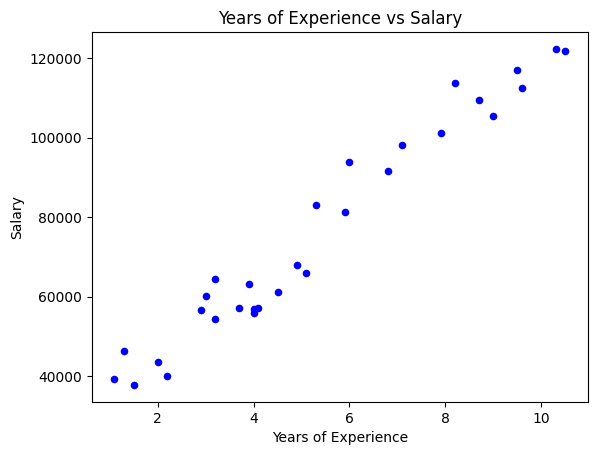

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import io

try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    from google.colab import files
    uploaded = files.upload()
    # Indentation corrected for the lines inside the except block
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))


df.fillna(df.mean(), inplace=True)

agg_df = df[['YearsExperience', 'Salary']].agg(['min', 'max', 'count', 'mean'])

filtered_df_1 = df[(df['Salary'] >= 50000) & (df['Salary'] <= 100000)]

filtered_df_2 = df[df['Salary'] > 50000]

plt.figure(figsize=(8, 6))
df.plot(kind='scatter', x='YearsExperience', y='Salary', title='Years of Experience vs Salary', color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Saving 13690569....csv to 13690569... (4).csv
Mean Squared Error: 35301898.887134895


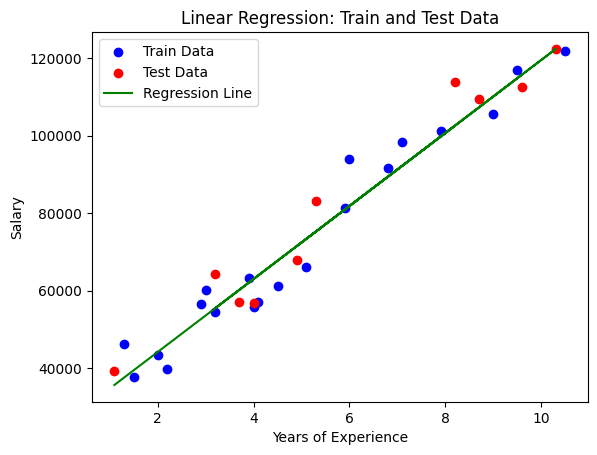

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import io

try:
    df = pd.read_csv('Salary_Data.csv')
except FileNotFoundError:
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='Regression Line')

plt.title('Linear Regression: Train and Test Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()